In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.callbacks import *

In [3]:
torch.cuda.is_available()

True

In [4]:
np.random.seed(42)

In [5]:
tfms=[flip_lr(p=0.5)],[]

In [6]:
mixup=0.2

In [7]:
loss_func = LabelSmoothingCrossEntropy()

In [8]:
alpha=0.99
mom=0.9
eps=1e-6

In [9]:
opt_func = partial(optim.Adam, betas=(mom,alpha), eps=eps)

In [10]:
src = (ImageList.from_folder(path='train').split_by_rand_pct(0.2).label_from_folder())

In [11]:
data = src.transform(tfms,size=(160)).databunch(bs=384).normalize().presize(320, scale=(0.35,1))

In [12]:
learn = cnn_learner(data, models.densenet121,pretrained=False, metrics=[error_rate, accuracy, FBeta(beta=1,average='macro')],loss_func = loss_func,opt_func=opt_func,wd=1e-2)

/home/ubuntu/anaconda3/envs/snakes_breed/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [13]:
learn= learn.mixup(alpha=mixup)

In [14]:
learn.bn_wd=False

In [15]:
learn.true_wd=True

In [16]:
learn.load('exp-5-round-2')

Learner(data=ImageDataBunch;

Train: LabelList (65934 items)
x: ImageList
Image (3, 160, 160),Image (3, 160, 160),Image (3, 160, 160),Image (3, 160, 160),Image (3, 160, 160)
y: CategoryList
class-857,class-857,class-857,class-857,class-857
Path: train;

Valid: LabelList (16483 items)
x: ImageList
Image (3, 160, 160),Image (3, 160, 160),Image (3, 160, 160),Image (3, 160, 160),Image (3, 160, 160)
y: CategoryList
class-540,class-526,class-771,class-4,class-804
Path: train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [17]:
data_192 = src.transform(tfms,size=(192)).databunch(bs=256).normalize().presize(384, scale=(0.35,1))

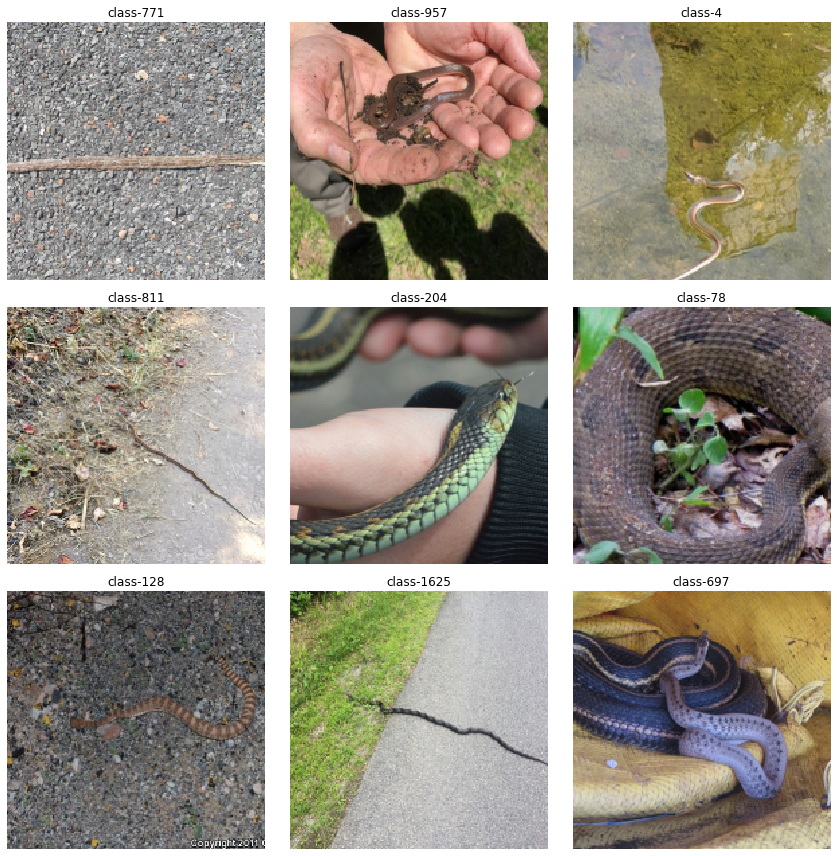

In [18]:
data_192.show_batch(rows=3, figsize=(12,12))


In [19]:
learn.data= data_192

In [20]:
learn.data

ImageDataBunch;

Train: LabelList (65934 items)
x: ImageList
Image (3, 192, 192),Image (3, 192, 192),Image (3, 192, 192),Image (3, 192, 192),Image (3, 192, 192)
y: CategoryList
class-857,class-857,class-857,class-857,class-857
Path: train;

Valid: LabelList (16483 items)
x: ImageList
Image (3, 192, 192),Image (3, 192, 192),Image (3, 192, 192),Image (3, 192, 192),Image (3, 192, 192)
y: CategoryList
class-540,class-526,class-771,class-4,class-804
Path: train;

Test: None

In [21]:
learn = learn.to_fp16(dynamic=True)

In [22]:
learn.unfreeze()

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


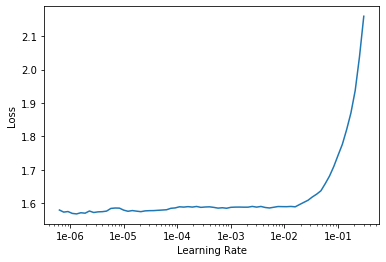

In [24]:
learn.recorder.plot()

In [25]:
lr=1e-3

In [26]:
learn.fit_one_cycle(10, lr, div_factor=10, pct_start=0.3)


epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,1.569468,1.669033,0.316144,0.683856,0.628583,06:17
1,1.575962,1.666004,0.315113,0.684887,0.632170,06:15
2,1.578696,1.677610,0.321725,0.678275,0.623361,06:18
3,1.567900,1.682821,0.319177,0.680823,0.626065,06:15
4,1.561743,1.681695,0.320451,0.679549,0.626042,06:13
5,1.545569,1.682181,0.320087,0.679913,0.627449,06:15
6,1.526673,1.683251,0.318449,0.681551,0.628481,06:14
7,1.518866,1.678374,0.316387,0.683613,0.629914,06:15
8,1.514110,1.678560,0.314567,0.685433,0.631461,06:16
9,1.501056,1.677794,0.314809,0.685191,0.634177,06:16


In [27]:
learn.save('exp-5-round-3')